# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from seaborn import load_dataset

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head() 

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [8]:
#1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em 'tip', explicada por 'sex', 'smoker', 'diner' e 'net_bill'
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [ ]:
#2. Remova as variáveis não significantes. 

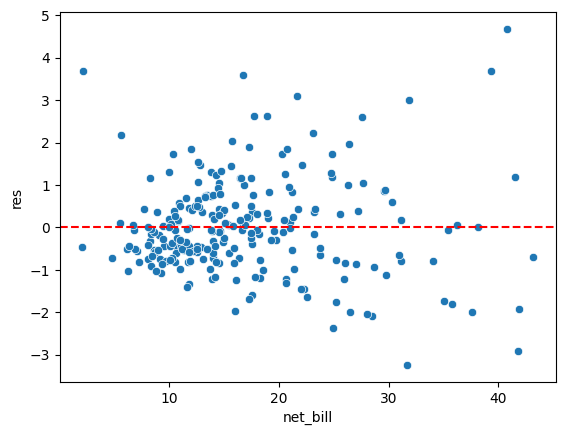

In [9]:
#3. observe o gráfico de resíduos em função de 'net_bill'
reg = sm.OLS(y,X).fit()
tips['res'] = reg.resid
sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

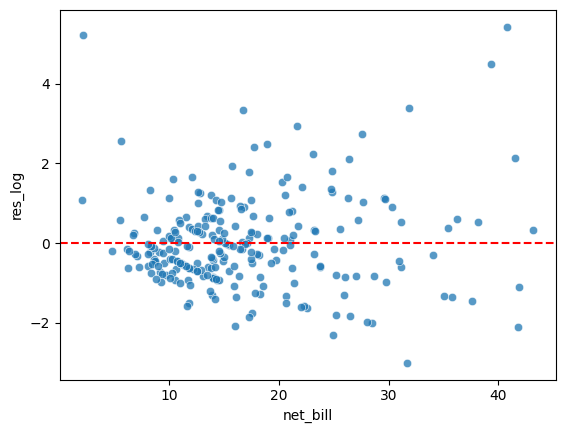

In [23]:
#4. teste transformar 'net_bill' no log e um polinômio. Escolha o melhor modelo.
reg_log = smf.ols('tip ~ np.log(net_bill+.1)',tips).fit()
tips['res_log'] = reg_log.resid
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

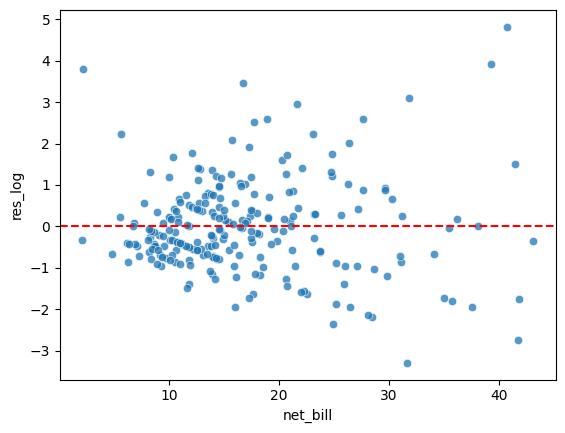

In [24]:
reg_log = smf.ols('tip ~ net_bill + np.power(net_bill,2)',tips).fit()
tips['res_log'] = reg_log.resid
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [25]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,res,res_log,res_pol
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,-1.975506,-1.946872,-1.905881
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,-0.602534,-0.480619,-0.534884
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.358799,0.381382,0.432253
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,-0.115797,-0.102297,-0.042031
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.126948,0.136528,0.197278
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11,2.221548,2.236945,2.295226
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18,-1.760517,-1.880730,-1.831022
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67,-1.315175,-1.442447,-1.381877
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07,-1.247907,-1.216476,-1.174810


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [4]:
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           1.21e-18
Time:                        10:15:22   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

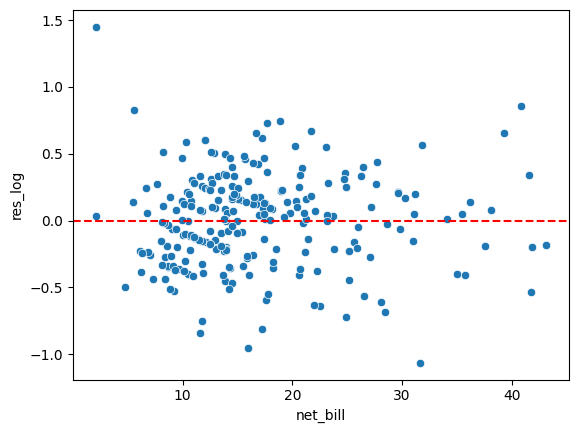

In [28]:
reg_tips_log = smf.ols('np.log(tip) ~ C(size) + np.log(net_bill)', data = tips).fit()

tips['res_log'] = reg_tips_log.resid
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.